<a href="https://colab.research.google.com/github/stephyi/Rossman-Pharmaceuticals-Sales-Prediction/blob/master/pharmaceuticals_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

What is your research question? What problem is it that you are trying to solve?

 * Analysing TellCo data to assess whether it is worth buying 

*  Main aim is to identify opportunities to drive profitability by focusing on which products or services are being offered hence help the investor make informed decisions on the value of the company

### b) Defining the Metric for Success

What will convince you that your project has succeeded?

 *  metrics that show lot of potential for growth will prove that the TellCo is worth buying.

### c) Understanding the Context 

 * The background information surrounding the problem or research question.

### d) Recording the Experimental Design

 * The steps that I will take from the beginning to the end of this project have been highlighted below.

### e) Data Relevance

* Looking into the data to identify relevant variable to the research problem.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
!pwd


/content/gdrive/My Drive/Kaggle
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle competitions download -c rossmann-store-sales

store.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

kaggle.json  sample_submission.csv  test.csv	  train.csv
model.pkl    store.csv		    test.csv.zip  train.csv.zip


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

2 archives were successfully processed.


In [ ]:
# load and preview dataset
store = pd.read_csv('store.csv')
store.sample(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
600,601,d,a,8220.0,4.0,2014.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
478,479,a,a,320.0,12.0,2005.0,1,9.0,2011.0,"Feb,May,Aug,Nov"
673,674,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
# load and preview dataset
train = pd.read_csv('train.csv')
train.sample(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
26346,702,3,2015-07-08,3879,332,1,0,0,0
742315,511,3,2013-09-04,4744,739,1,0,0,0
971193,814,1,2013-02-11,6914,607,1,0,0,0


In [ ]:
# load and preview dataset
test = pd.read_csv('test.csv')
test.sample(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
2198,2199,631,2,2015-09-15,1.0,1,0,0
4678,4679,519,6,2015-09-12,1.0,0,0,0
36875,36876,89,3,2015-08-05,1.0,1,0,1


**EXPLORING TRAIN DATASET**

>>There are no missing values.So let's divide the dataset into categorical and numerical and work on that.

In [ ]:
#train_data
train.head(5)
train['Date'] = pd.to_datetime(train['Date'],format = '%Y-%m-%d')

train['day']=train['Date'].dt.day
train['month']=train['Date'].dt.month
train['year']=train['Date'].dt.year



In [ ]:
df_train_store=pd.merge(store,train,how='left',on='Store')


In [ ]:

map_promo= {'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}
df_train_store['PromoInterval']=df_train_store['PromoInterval'].map(map_promo)

df_train_store['StateHoliday'].replace({0:'o','0':'o'},inplace=True)
df_train_store['StateHoliday'].replace({'0':'o'},inplace=True)

df_train_store = df_train_store[df_train_store["Open"] != 0]

#df_train_store=df_train_store.drop(df_train_store[(df_train_store.Open == 0) & (df_train_store.Sales == 0)].index)
#df_train_store = df_train_store.reset_index(drop=True)


In [ ]:
df_train_store=df_train_store.drop(['Date','Open','Store'],axis=1)

In [ ]:
X=df_train_store.drop(['Sales'],axis=1)
y=np.log1p(df_train_store.Sales)

In [ ]:

y.head(5)

0    8.568646
1    8.521384
2    8.472823
3    8.519590
4    8.716536
Name: Sales, dtype: float64

In [ ]:
df_train_store.sample(3)

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,day,month,year
845641,d,c,1090.0,NaN,NaN,1,31.0,2013.0,2.0,2,3812,412,0,o,0,15,1,2013
197007,a,c,640.0,NaN,NaN,1,9.0,2011.0,3.0,4,4840,739,0,o,0,13,3,2014
811444,a,a,4450.0,NaN,NaN,1,14.0,2011.0,1.0,3,3770,327,0,o,0,13,3,2013


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

##SKLEARN MODEL PIPELINE


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

##Function to preprocess the data

num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                    #('drop_attributes', AttributeDeleter()),
                                    #('std_scaler', StandardScaler())
                            ])
categorical_pipeline=Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

categorical_features = df_train_store.select_dtypes(include=['object']).columns
numerical_features = df_train_store.select_dtypes(include=['float64', 'int64']).drop(['Sales'],axis=1).columns

full_pipeline = ColumnTransformer(
        transformers=[('num', num_pipeline, numerical_features),
                     ('cat', categorical_pipeline, categorical_features)])

    

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
rf = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('regressor', RandomForestRegressor())])

In [ ]:

rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_test,y_pred)

0.9772408467982464

In [ ]:
mean_squared_error(y_test,y_pred)

0.004218674388666687

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06495132322490964

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score, mean_squared_error
regressors = [
    KNeighborsRegressor(3),
    LinearSVR(),
    DecisionTreeRegressor(max_depth = 20, random_state = 42),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    LinearRegression()
    ]
for regressor in regressors:
    pipe = Pipeline(steps=[('pipeline', full_pipeline),
                      ('regressor', regressor)])
    pipe.fit(X_train, y_train)   
    print(regressor)

    y_pred = pipe.predict(X_test)
    print("model score: %.3f" % r2_score(y_test,y_pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
model score: 0.940


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
model score: 0.591
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')
model score: 0.955
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                   

In [ ]:
!pip install pickle-mixin

In [ ]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))

# Loading model to compare the results
#model = pickle.load(open('model.pkl','rb'))


## TASK ONE  
**Data Visualization**

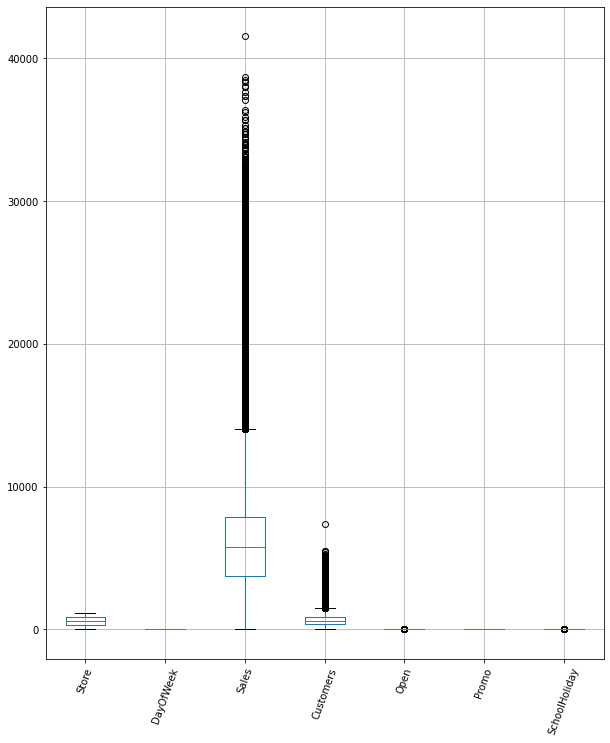

In [ ]:

# get the summary statistics

box=train.drop(['Date','StateHoliday'],axis=1)

num_cols = box.columns.to_list()


plt.figure(figsize = (10, 12))
train.boxplot(num_cols)
plt.xticks(rotation = 70)
plt.show()

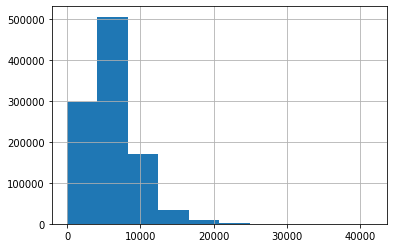

In [ ]:
train['Sales'].hist()

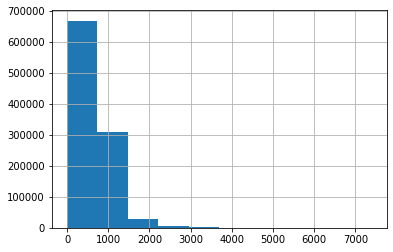

In [ ]:
train['Customers'].hist()

In [ ]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**DATE**

In [ ]:
train['Date'] = pd.to_datetime(train['Date'],format = '%Y-%m-%d')

train['day']=train['Date'].dt.day
train['month']=train['Date'].dt.month
train['year']=train['Date'].dt.year

In [ ]:
train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015


Text(0, 0.5, 'Sales')

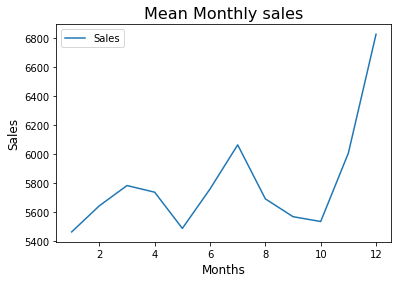

In [ ]:
monthly_sales=train.groupby('month').agg({'Sales':'mean'})
monthly_sales.plot(kind='line')
plt.title('Mean Monthly sales',fontsize=16)
plt.xlabel('Months',fontsize=12)
plt.ylabel('Sales',fontsize=12)

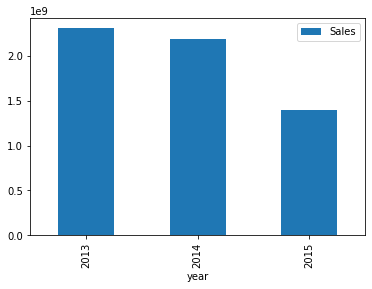

In [ ]:
yearly_sales=train.groupby('year').agg({'Sales':'sum'})
yearly_sales.plot(kind='bar')

In [ ]:
train[train['Date']=='2014-06']

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
440755,1,7,2014-06-01,0,0,0,0,0,0,1,6,2014
440756,2,7,2014-06-01,0,0,0,0,0,0,1,6,2014
440757,3,7,2014-06-01,0,0,0,0,0,0,1,6,2014
440758,4,7,2014-06-01,0,0,0,0,0,0,1,6,2014
440759,5,7,2014-06-01,0,0,0,0,0,0,1,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
441865,1111,7,2014-06-01,0,0,0,0,0,0,1,6,2014
441866,1112,7,2014-06-01,0,0,0,0,0,0,1,6,2014
441867,1113,7,2014-06-01,0,0,0,0,0,0,1,6,2014
441868,1114,7,2014-06-01,0,0,0,0,0,0,1,6,2014


In [ ]:
train['Date']=train['Date'].dt.strftime('%Y-%m')
train.sample(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
818224,600,5,2013-06,7579,632,1,0,0,1,28,6,2013
67291,392,1,2015-06,12103,1013,1,1,0,0,1,6,2015
159474,30,2,2015-03,3849,594,1,0,0,0,10,3,2015


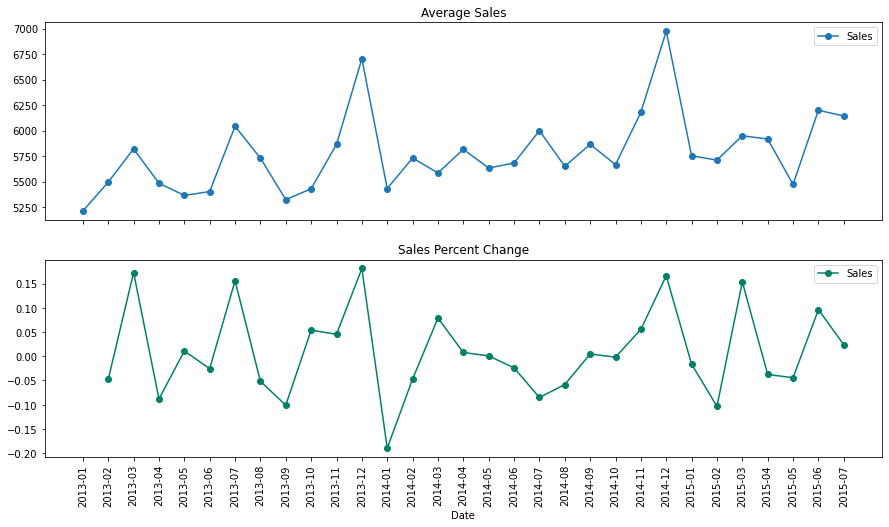

In [ ]:
# group by date and get average sales, and precent change
average_sales    = train.groupby('Date')["Sales"].mean()
pct_change_sales = train.groupby('Date')["Sales"].sum().pct_change()


fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)


# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")

**Check & compare sales behavior before, during and after holidays**

In [ ]:
train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [ ]:
train['SchoolHoliday'].unique()

array([1, 0])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


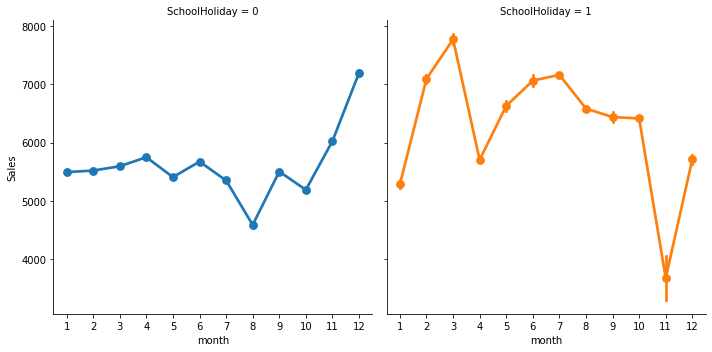

In [ ]:

sns.factorplot(data = train, x ="month", y = "Sales", 
               col = 'SchoolHoliday', # per store type in cols
               hue = 'SchoolHoliday'
              ,sharex=False)

[Text(0, 0.5, 'Values'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Line plot of sales during School holidays')]

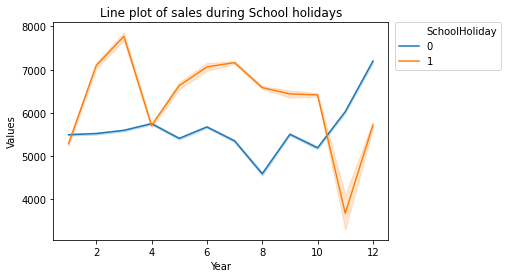

In [ ]:
lp = sns.lineplot(x='month', y='Sales', hue='SchoolHoliday', data=train)

#Position the legend out the graph
lp.legend(bbox_to_anchor=(1.02, 1),
          loc=2, 
          borderaxespad=0.0);
lp.set(title='Line plot of sales during School holidays', xlabel='Year', ylabel='Values')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text major ticklabel objects>)

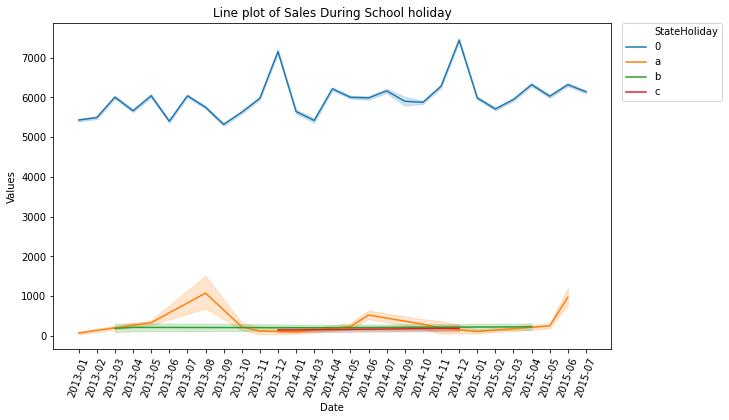

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
lp = sns.lineplot(x='Date', y='Sales', hue='StateHoliday', data=train)

#Position the legend out the graph
lp.legend(bbox_to_anchor=(1.02, 1),
          loc=2, 
          borderaxespad=0.0);
lp.set(title='Line plot of Sales During School holiday', xlabel='Year', ylabel='Values')
plt.xlabel('Date')
plt.xticks(rotation=70)

**Find out any seasonal (Christmas, Easter etc) purchase behaviours**

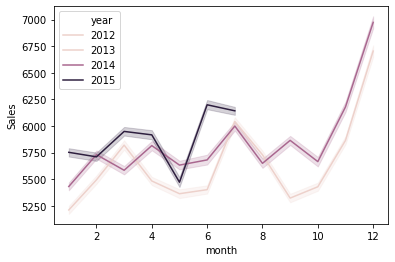

In [ ]:
sns.lineplot(data = train, x ="month", y = "Sales",
               hue='year')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


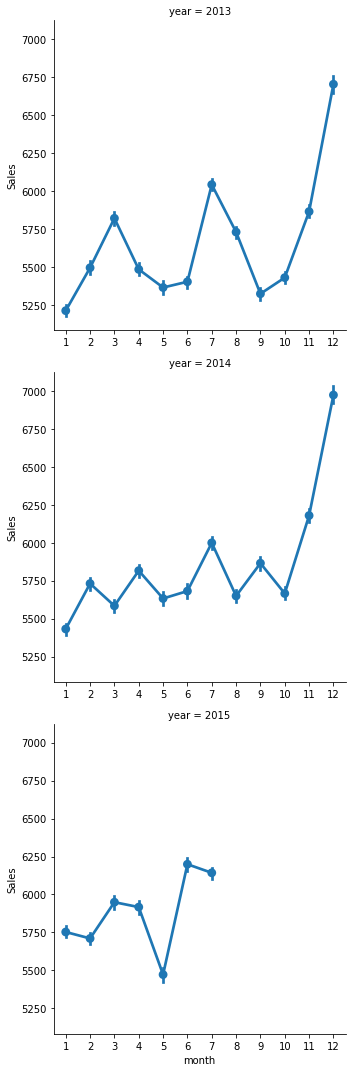

In [ ]:
sns.factorplot(data = train, x ="month", y = "Sales",
               row='year'
              ,sharex=False)

**PROMOTION**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


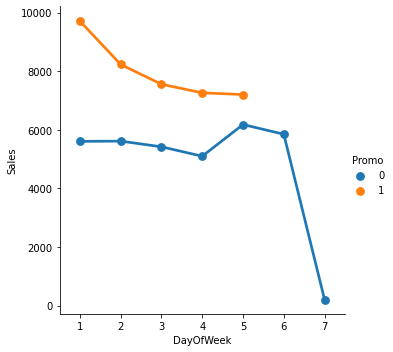

In [ ]:
sns.factorplot(data = train, x ="DayOfWeek", y = "Sales",
                hue='Promo'
              ,sharex=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text major ticklabel objects>)

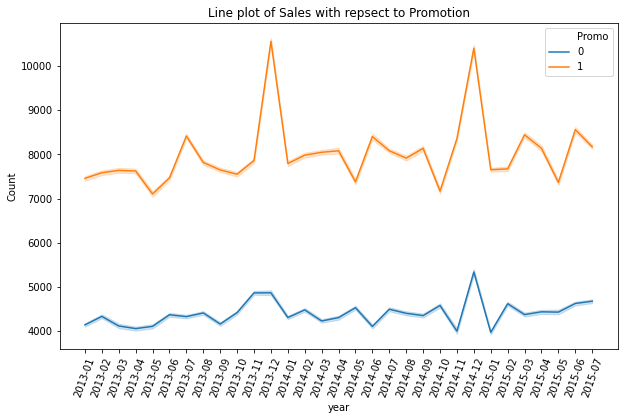

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
lp = sns.lineplot(x="Date", 
                  y="Sales",
                  hue="Promo",
                  data=train);


# add a title and axes labels
lp.set(title='Line plot of Sales with repsect to Promotion',
       xlabel='year', 
       ylabel='Count');
plt.xticks(rotation=70)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text major ticklabel objects>)

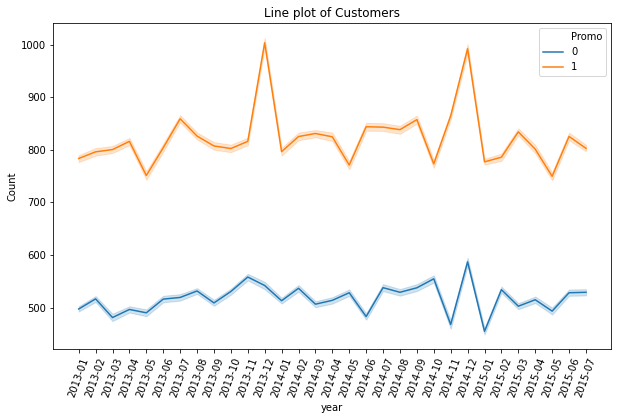

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
lp = sns.lineplot(x="Date", 
                  y="Customers",
                  hue="Promo",
                  data=train);


# add a title and axes labels
lp.set(title='Line plot of Customers',
       xlabel='year', 
       ylabel='Count');
plt.xticks(rotation=70)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


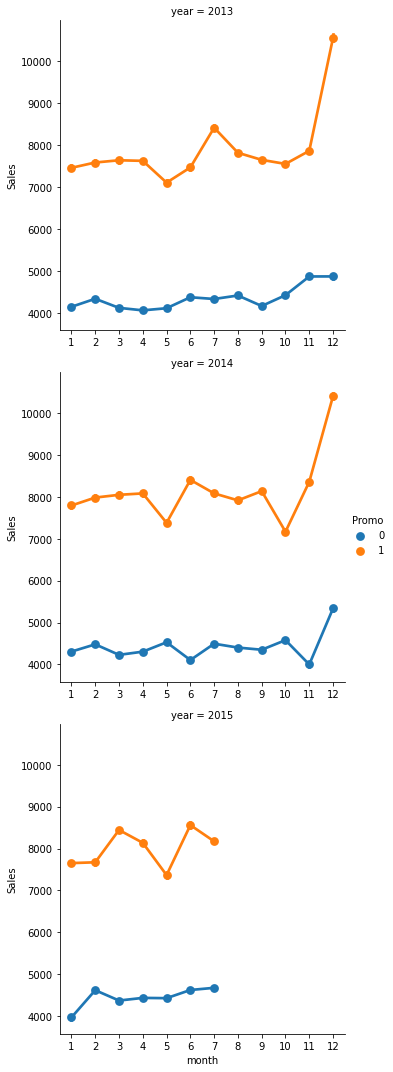

In [ ]:
sns.factorplot(data = train, x ="month", y = "Sales",
                hue='Promo',
               row='year'
              ,sharex=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


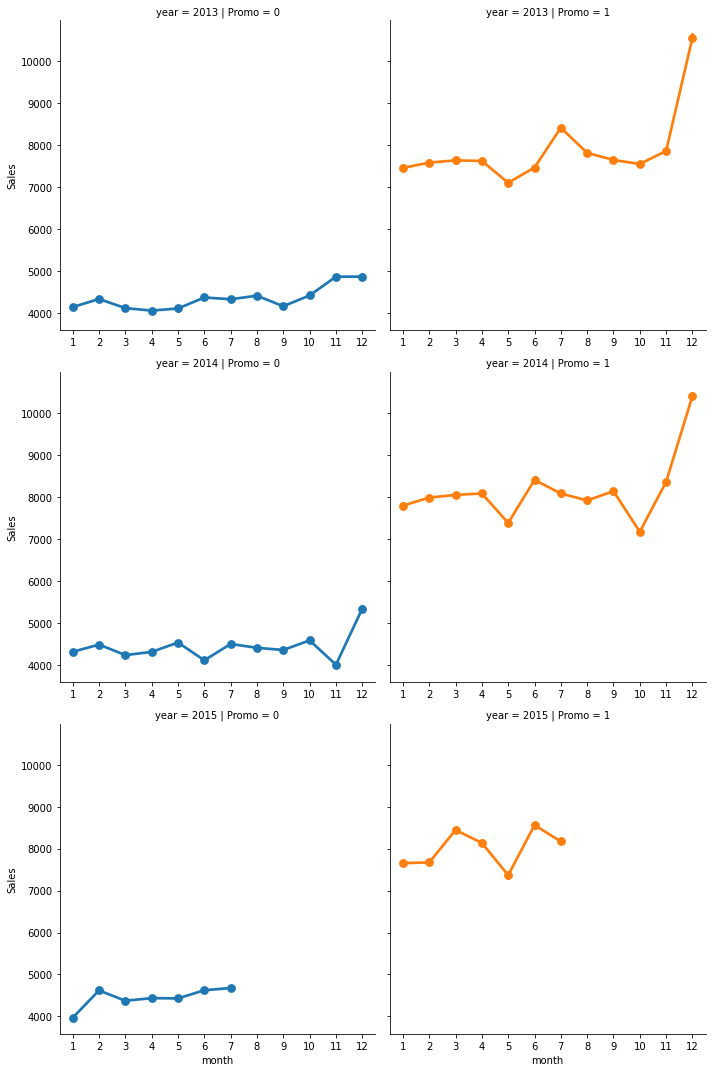

In [ ]:
sns.factorplot(data = train, x ="month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo',
               row = "year"
              ,sharex=False)

**SALES AND CUSTOMERS CORRELATION**
 ### *What can you say about the correlation between sales and number of customers?*

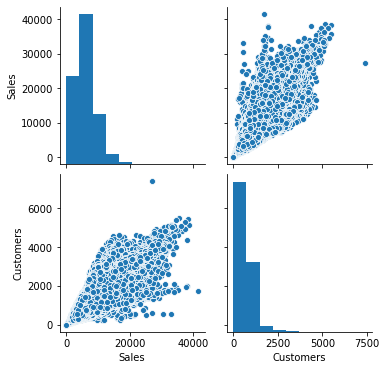

In [ ]:
df_corr=train[['Sales','Customers']]

sns.pairplot(df_corr)

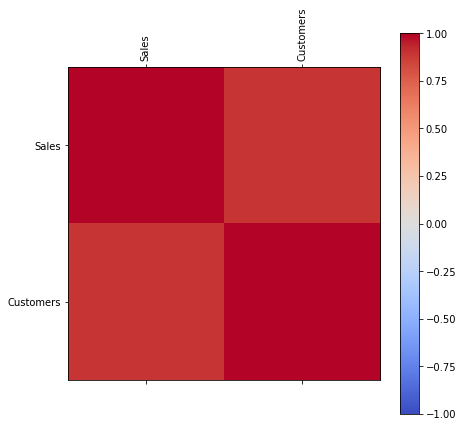

In [ ]:
corr = df_corr.corr()

# plotting the correlations onto a heatmap
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
#plt.title('Correlation between sales and customers')
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()

**STORES OPENED ON ALL WEEKDAYS.HOW DOES THAT AFFECT THEIR SALES ON WEEKENDS**

In [ ]:
train[train['DayOfWeek']==5]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1013860,1111,5,2013-01-04,4640,453,1,0,0,1
1013861,1112,5,2013-01-04,9788,861,1,0,0,1
1013862,1113,5,2013-01-04,5524,646,1,0,0,1
1013863,1114,5,2013-01-04,18371,3036,1,0,0,1


In [ ]:
weekend=df_train_store[(df_train_store['DayOfWeek']==6) | (df_train_store['DayOfWeek']==7)]
weekday=df_train_store[(df_train_store['DayOfWeek']!=6) & (df_train_store['DayOfWeek']!=7)]

In [ ]:
weekend.groupby('Store')

In [ ]:
weekday.groupby('Store')['Sales'].mean().reset_index().sort_values(by='Sales',ascending='False')

,Store,Sales
207,208,2768.894659
253,254,2801.589021
306,307,2869.813056
542,543,2914.200297
793,794,3076.216617
...,...,...
250,251,18445.221068
561,562,18577.231454
1113,1114,19678.379822
261,262,19813.574184


In [ ]:
weekend.groupby('Store').agg({'Sales':'mean'}).sort_values(by='Sales',ascending=False)

,Sales
Store,
262,22994.376866
562,16441.298507
733,14579.511194
259,11605.753731
423,11059.324627
...,...
970,675.645522
307,671.895522
607,644.764925


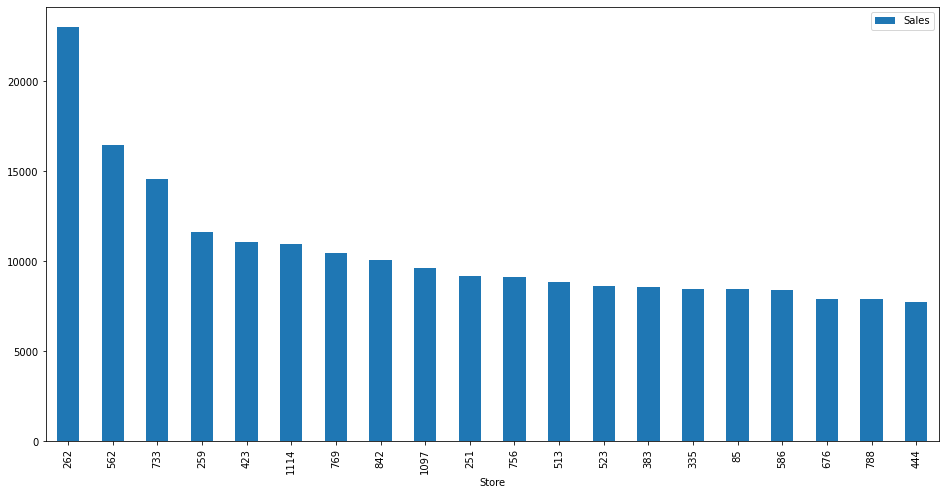

In [ ]:

fig,ax=plt.subplots(figsize=(16,8))
weekend.groupby('Store').agg({'Sales':'mean'}).sort_values(by='Sales',ascending=False).head(20).plot(kind='bar',legend=True, ax=ax)


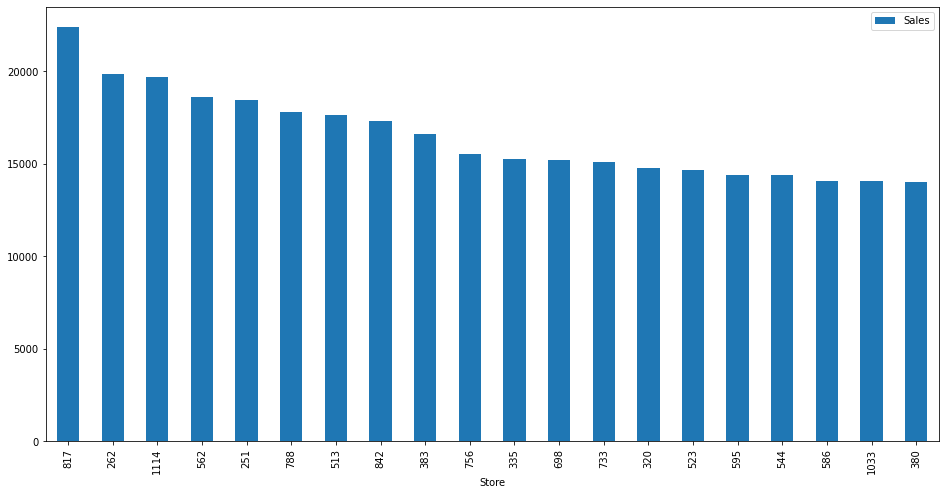

In [ ]:

fig,ax=plt.subplots(figsize=(16,8))
weekday.groupby('Store').agg({'Sales':'mean'}).sort_values(by='Sales',ascending=False).head(20).plot(kind='bar',legend=True, ax=ax)

In [ ]:
weekday.groupby('Store').agg({'Sales':'mean'}).sort_values(by='Sales',ascending=False).reset_index()

,Store,Sales
0,817,22355.127596
1,262,19813.574184
2,1114,19678.379822
3,562,18577.231454
4,251,18445.221068
...,...,...
1110,794,3076.216617
1111,543,2914.200297
1112,307,2869.813056
1113,254,2801.589021


**ASSORTMENT**

Text(0.5, 1.0, 'Number of Stores by Assortment Type')

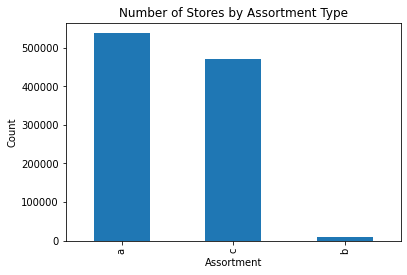

In [ ]:
df_train_store['Assortment'].value_counts().plot(kind='bar')
plt.xlabel('Assortment')
plt.ylabel('Count')
plt.title('Number of Stores by Assortment Type')

Text(0.5, 1.0, 'Mean Sales by Assortment Type')

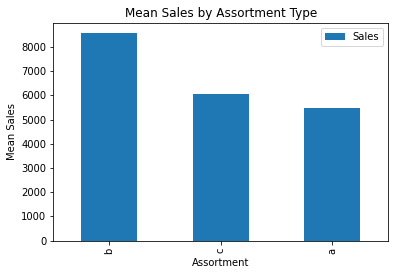

In [ ]:
df_train_store.groupby('Assortment').agg({'Sales':'mean'}).sort_values(by='Sales',ascending=False).plot(kind='bar')

plt.xlabel('Assortment')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Assortment Type')

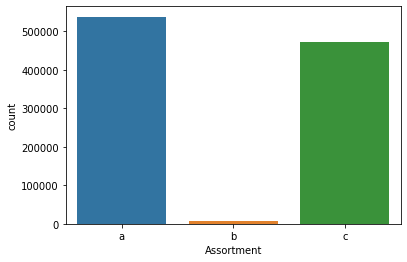

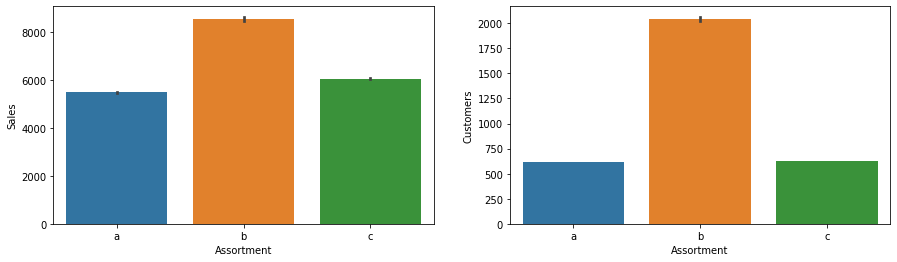

In [ ]:
# Assortment 

# Plot Assortment, & Assortment Vs average sales and customers

sns.countplot(x='Assortment', data=df_train_store, order=['a','b','c'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=df_train_store, order=['a','b','c'], ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=df_train_store, order=['a','b','c'], ax=axis2)

Text(0.5, 1.0, 'Number of Different Assortments per Store Type')

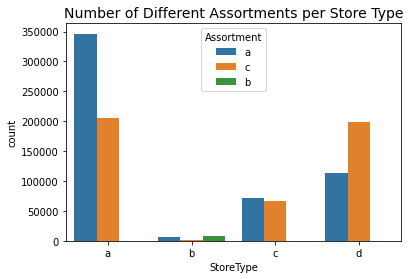

In [ ]:
StoretypeXAssortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"],
                                     data=df_train_store)
                                     #palette=sns.set_title("Number of Different Assortments per Store Type")
df_train_store.groupby(by=["StoreType","Assortment"]).Assortment.count()
plt.title("Number of Different Assortments per Store Type",fontsize=14)

**How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?**

In [ ]:
df_train_store['CompetitionDist_Cat']=pd.cut(df_train_store['CompetitionDistance'], 10)
df_train_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDist_Cat
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1,"(-55.84, 7604.0]"
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1,"(-55.84, 7604.0]"
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1,"(-55.84, 7604.0]"
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1,"(-55.84, 7604.0]"
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1,"(-55.84, 7604.0]"


Text(0.5, 0, 'Distance group')

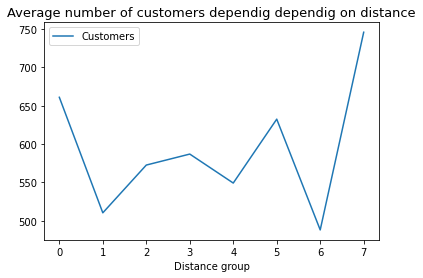

In [ ]:
SalesByDistance=df_train_store.groupby(by="CompetitionDist_Cat").Sales.mean().reset_index()
CustomersByDistance=df_train_store.groupby(by="CompetitionDist_Cat").Customers.mean().reset_index().head(8)
CustomersByDistance.plot(kind='line')
plt.title('Average number of customers dependig dependig on distance',fontsize=13)
plt.xlabel('Distance group')

Text(0, 0.5, 'Average Sales')

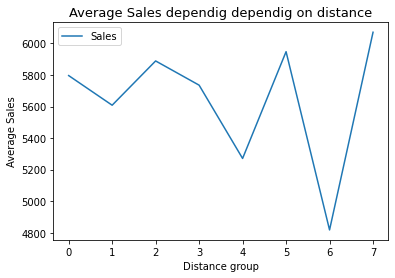

In [ ]:
SalesByDistance.head(8).plot(kind='line')
plt.title('Average Sales dependig dependig on distance',fontsize=13)
plt.xlabel('Distance group')
plt.ylabel('Average Sales')

In [ ]:
df_train_store["CompetitionDistance"].isnull().sum()

0

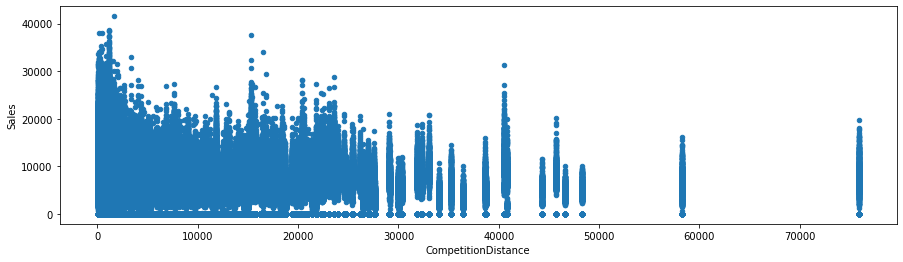

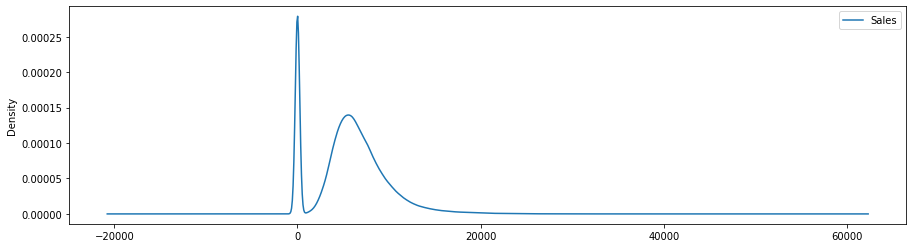

In [ ]:
df_train_store["CompetitionDistance"].fillna(df_train_store["CompetitionDistance"].median(),inplace=True)

# Plot CompetitionDistance Vs Sales
df_train_store.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))
df_train_store.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,4))

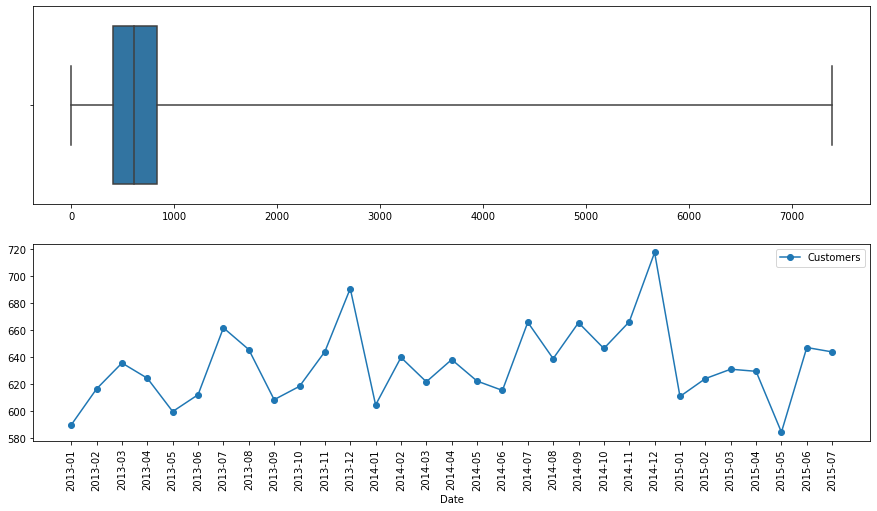

In [ ]:
# Customers

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,8))

# Plot max, min values, & 2nd, 3rd quartile
sns.boxplot([train["Customers"]], whis=np.inf, ax=axis1)

# group by date and get average customers, and precent change
average_customers      = train.groupby('Date')["Customers"].mean()
# pct_change_customers = rossmann_df.groupby('Date')["Customers"].sum().pct_change()

# Plot average customers over the time
# it should be correlated with the average sales over time
ax = average_customers.plot(legend=True,marker='o', ax=axis2)
ax.set_xticks(range(len(average_customers)))
xlabels = ax.set_xticklabels(average_customers.index.tolist(), rotation=90)

**SEASONALITY**

In [ ]:
train.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

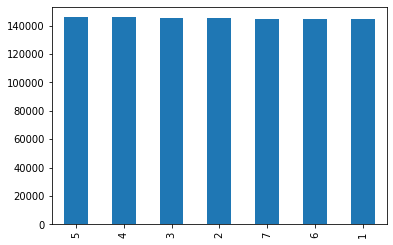

In [ ]:
train.DayOfWeek.value_counts().plot(kind='bar')

>>Each Day of the week has approxiamtely the same sales

In [ ]:
store = pd.read_csv('store.csv')
store.sample(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
575,576,c,a,50.0,11.0,2006.0,0,NaN,NaN,NaN
1080,1081,b,a,400.0,3.0,2006.0,0,NaN,NaN,NaN
518,519,c,c,2510.0,8.0,2009.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store.count(0)/store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

In [ ]:
df_train_store=pd.merge(store,train,how='left',on='Store')

In [ ]:
store['Store']

0          1
1          2
2          3
3          4
4          5
        ... 
1110    1111
1111    1112
1112    1113
1113    1114
1114    1115
Name: Store, Length: 1115, dtype: int64

In [ ]:
df_train_store.sample(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
465229,510,a,c,8260.0,NaN,NaN,0,NaN,NaN,NaN,1,2013-10-14,8251,924,1,0,0,0
246147,271,a,a,420.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5,2014-05-02,12121,1139,1,1,0,0
745100,818,d,a,490.0,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec",4,2013-09-05,4509,576,1,0,0,0


In [ ]:
df_train_store['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [ ]:
df_train_store[df_train_store['CompetitionOpenSinceYear'].isnull() == True].count()

Store                        323348
StoreType                    323348
Assortment                   323348
CompetitionDistance          320706
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                       323348
Promo2SinceWeek              184852
Promo2SinceYear              184852
PromoInterval                184852
DayOfWeek                    323348
Date                         323348
Sales                        323348
Customers                    323348
Open                         323348
Promo                        323348
StateHoliday                 323348
SchoolHoliday                323348
CompetitionDist_Cat          320706
dtype: int64

In [ ]:
# check dataset shape
df_train_store.shape

(1017209, 21)

Our dataset has 1017209 records and 18 variables.

In [ ]:
# preview variable datatypes
df_train_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
dtype: object

In [ ]:
# check for duplicates
df_train_store.duplicated().sum()

0

In [ ]:
# check for missing values
df_train_store.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

**TREND OF CUSTOMER BEHAVIOR DURING STORE OPEN AND CLOSING TIME**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text major ticklabel objects>)

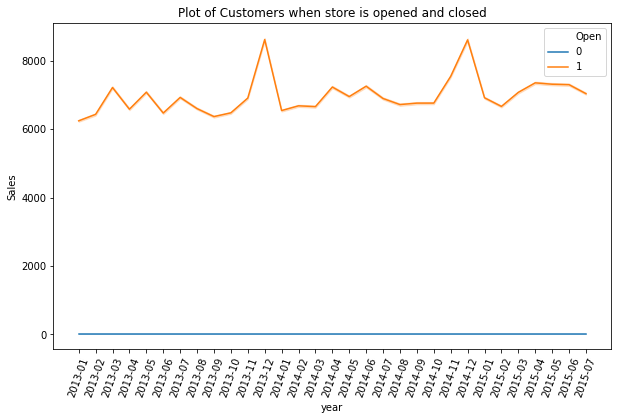

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
lp = sns.lineplot(x="Date", 
                  y="Sales",
                  hue="Open",
                  data=train);


# add a title and axes labels
lp.set(title='Plot of Customers when store is opened and closed',
       xlabel='year', 
       ylabel='Sales');
plt.xticks(rotation=70)

In [ ]:
df_train_store.sample(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDist_Cat
644074,707,a,c,2900.0,7.0,1990.0,0,NaN,NaN,NaN,4,2013-01-24,8097,866,1,1,0,0,"(-55.84, 7604.0]"
386724,424,d,c,1250.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",7,2013-12-22,0,0,0,0,0,0,"(-55.84, 7604.0]"
38251,42,a,c,290.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",7,2013-07-28,0,0,0,0,0,0,"(-55.84, 7604.0]"


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text major ticklabel objects>)

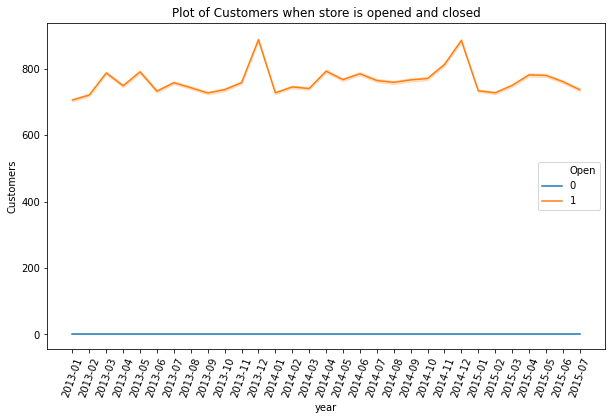

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
lp = sns.lineplot(x="Date", 
                  y="Customers",
                  hue="Open",
                  data=train);


# add a title and axes labels
lp.set(title='Plot of Customers when store is opened and closed',
       xlabel='year', 
       ylabel='Customers');
plt.xticks(rotation=70)

In [ ]:
closed=train[train['Open']==0]
closed.sample(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
383738,678,7,2014-07,0,0,0,0,0,0,27,7,2014
480809,1030,7,2014-04,0,0,0,0,0,0,27,4,2014
68287,273,7,2015-05,0,0,0,0,0,0,31,5,2015


In [ ]:
columns = train.drop(['Date'],axis=1)

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", train[col].nunique())
    print(train[col].unique())
    print()

Variable: Store
Number of unique values: 1115
[   1    2    3 ... 1113 1114 1115]

Variable: DayOfWeek
Number of unique values: 7
[5 4 3 2 1 7 6]

Variable: Sales
Number of unique values: 21734
[ 5263  6064  8314 ...   660 17815 23303]

Variable: Customers
Number of unique values: 4086
[ 555  625  821 ... 3900   36 4065]

Variable: Open
Number of unique values: 2
[1 0]

Variable: Promo
Number of unique values: 2
[1 0]

Variable: StateHoliday
Number of unique values: 5
['0' 'a' 'b' 'c' 0]

Variable: SchoolHoliday
Number of unique values: 2
[1 0]

Variable: day
Number of unique values: 31
[31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8
  7  6  5  4  3  2  1]

Variable: month
Number of unique values: 12
[ 7  6  5  4  3  2  1 12 11 10  9  8]

Variable: year
Number of unique values: 3
[2015 2014 2013]



## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [ ]:
# get the summary statistics
df1=df.drop(['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)'],axis=1)
df1.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Google_Total,Email_Total,Youtube_Total,Netflix_Total,Gaming_Total,Other_Total,Total_DL_UL,SM_Total
count,1.483460e+05,148346.000000,148346.000000,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,148346.000000,148346.000000,148346.000000,148346.000000,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,148346.000000,1.483460e+05,1.483460e+05,1.483460e+05,148346.000000,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05
mean,1.014659e+19,499.218934,498.624344,1.051294e+05,2.082017e+14,4.191542e+10,4.849938e+13,106.672265,17.638912,13290.626421,1771.301437,2.090016e+07,7.639695e+05,1.152947e+08,3.264305e+06,1.839333e+06,1.415899e+06,1.051299e+08,1.795138e+06,32922.516772,5.751626e+06,2.056246e+06,1.791723e+06,467382.679944,1.163445e+07,1.100857e+07,1.162748e+07,1.100187e+07,4.220992e+08,8.290269e+06,4.211656e+08,8.262890e+06,4.112015e+07,4.546996e+08,7.807873e+06,2.259106e+06,2.264303e+07,2.262935e+07,4.303894e+08,4.294285e+08,8.224031e+07,1.828061e+06
std,2.893242e+18,288.559368,288.076442,8.101836e+04,1.525929e+10,2.452297e+12,2.242914e+13,528.569222,76.507675,23998.929567,4630.958094,1.172158e+08,1.586344e+07,6.545173e+08,1.326482e+07,5.720704e+06,4.664160e+06,8.101835e+07,1.035473e+06,19008.768333,3.308890e+06,1.189988e+06,1.036027e+06,269996.095412,6.711222e+06,6.345554e+06,6.725235e+06,6.358185e+06,2.440025e+08,4.781597e+06,2.431682e+08,4.769352e+06,1.127958e+07,2.441771e+08,3.516809e+06,1.071225e+06,9.246986e+06,9.261040e+06,2.440545e+08,2.432324e+08,2.255915e+07,1.035639e+06
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05,5.733784e+06,1.563000e+03
25%,7.349880e+18,250.000000,251.000000,5.837400e+04,2.082010e+14,3.365131e+10,3.546075e+13,35.000000,3.000000,43.000000,47.000000,1.414471e+06,6.590000e+04,3.245648e+06,3.578680e+05,1.486500e+04,2.152450e+04,5.837439e+07,8.989515e+05,16431.250000,2.883119e+06,1.023912e+06,8.925018e+05,233413.750000,5.833526e+06,5.515832e+06,5.778898e+06,5.476158e+06,2.105496e+08,4.132224e+06,2.102759e+08,4.143476e+06,3.321763e+07,2.431725e+08,4.944519e+06,1.359097e+06,1.599400e+07,1.597961e+07,2.187727e+08,2.186225e+08,6.643526e+07,9.321075e+05
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082020e+14,3.366371e+10,3.572230e+13,54.000000,7.000000,63.000000,62.000000,2.080991e+07,7.596587e+05,1.144710e+08,3.242301e+06,3.903350e+04,4.649200e+04,8.639999e+07,1.793802e+06,32916.000000,5.767286e+06,2.054278e+06,1.793586e+06,466419.000000,1.161727e+07,1.101197e+07,1.164286e+07,1.099907e+07,4.235369e+08,8.293466e+06,4.218711e+08,8.265908e+06,4.114375e+07,4.560177e+08,7.815536e+06,2.263982e+06,2.266287e+07,2.263638e+07,4.316914e+08,4.300709e+08,8.228750e+07,1.825882e+06
75%,1.304240e+19,749.000000,749.000000,1.329658e+05,2.082020e+14,3.368352e+10,8.6

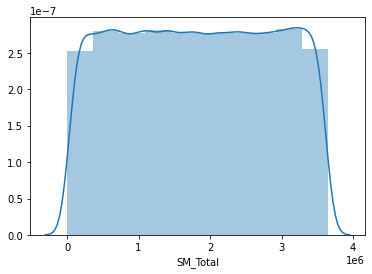

In [ ]:
sns.distplot(df1['SM_Total'],hist=True, bins=10);

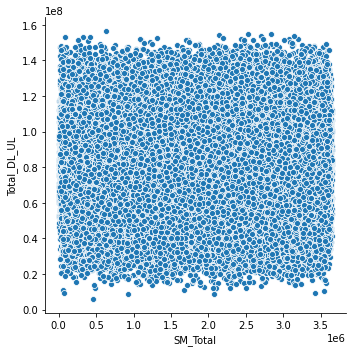

In [ ]:
sns.relplot(x="SM_Total", y="Total_DL_UL", data=df);

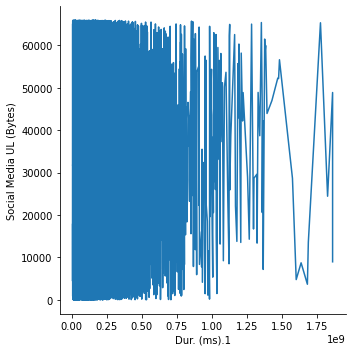

In [ ]:
sns.relplot(x="Dur. (ms).1", y="Social Media UL (Bytes)", kind="line", data=df1)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


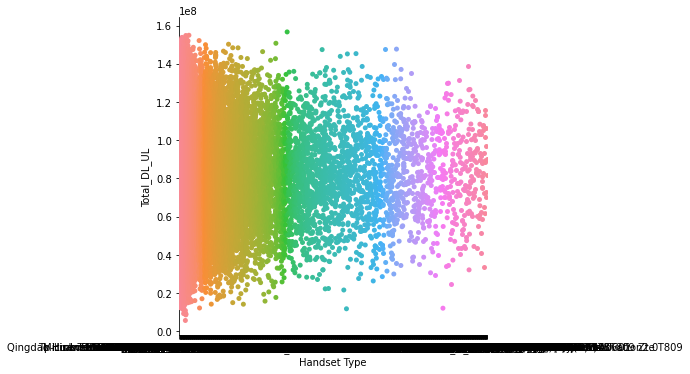

In [ ]:
sns.catplot(x="Handset Type", y="Total_DL_UL", data=df1);

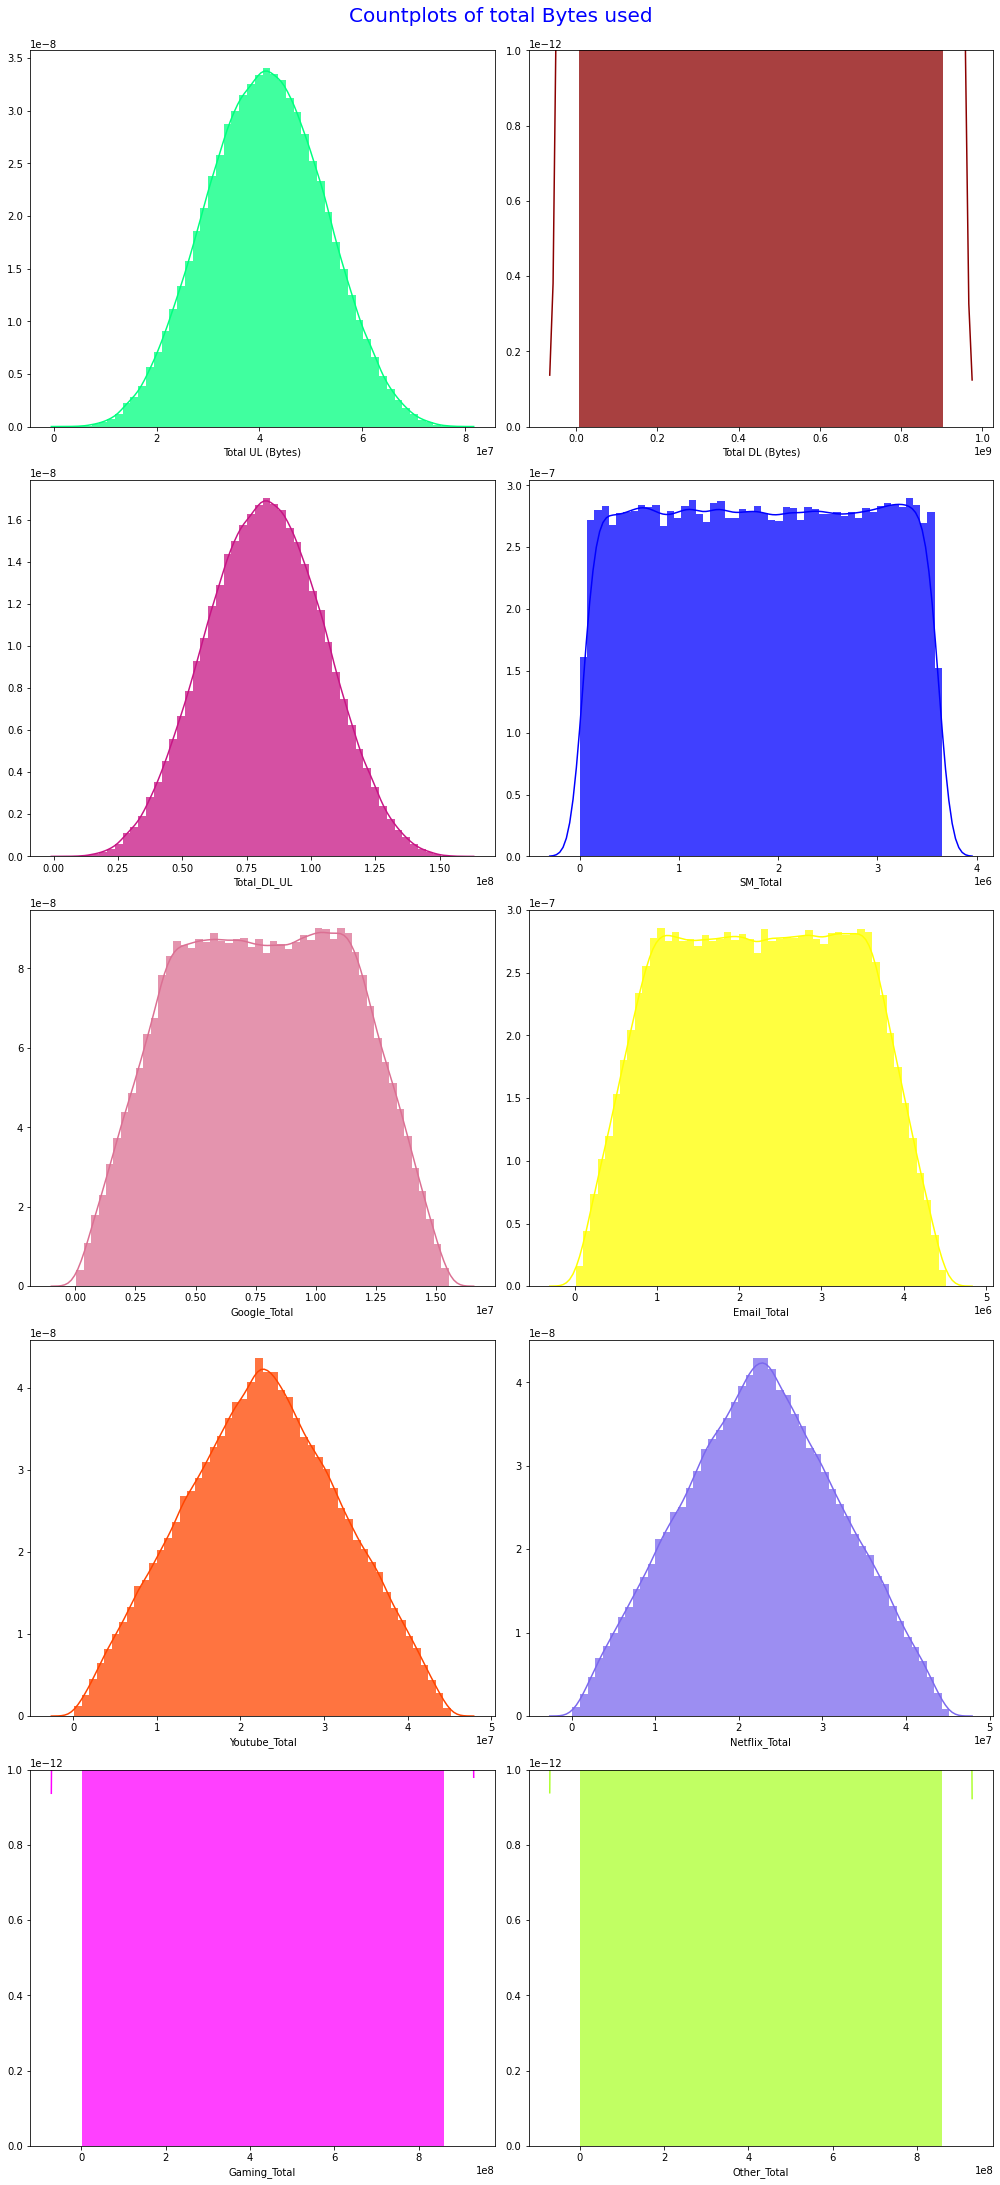

In [ ]:
df_corr=df[['Total UL (Bytes)', 'Total DL (Bytes)', 'Total_DL_UL', 'SM_Total',
       'Google_Total', 'Email_Total', 'Youtube_Total', 'Netflix_Total',
       'Gaming_Total', 'Other_Total']]
num_cols=df_corr.columns.to_list()
# plotting the histograms of all our numerical variables 


fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (14, 30))
plt.suptitle('Countplots of total Bytes used', fontsize = 20, y = 1.01, color = 'blue')

colors = ['#00FF7F', '#8B0000', '#C71585', '#0000FF', '#DB7093', '#FFFF00', '#FF4500',
          '#7B68EE', '#FF00FF', '#ADFF2F', '#FFD700', '#A52A2A', '#2F4F4F', '#8B008B']
for ax, column, color in zip(axes.flatten(), num_cols, colors):
    sns.distplot(df_corr[column], ax = ax, color = color, hist_kws = dict(alpha = 0.75))
    
plt.tight_layout()

Majority of the numerical variables have normal distributions. Apart from having most of its values in the 0-5 bin, the 'number_vmail_messages' variable appears to be normally distributed. The 'total_intl_calls' variable is skewed to the right and is not continuous.

### 3.2 Bivariata Analysis

* explore the relationship between each application &
the total DL+UL data using appropriate methods and interpret your
findings

### 3.3 Variable Transformation


* segment the users into top five decile classes
based on the total duration for all sessions and compute the total data
(DL+UL) per decile class.

In [ ]:
decile_df=df.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum','Total_DL_UL':'sum'}).sort_values(by='Dur. (ms)',ascending=False).reset_index()

In [ ]:
decile_df['decile']=pd.qcut(decile_df['Dur. (ms)'], q=10, precision=0)

In [ ]:
decile_df.head(5)

,MSISDN/Number,Dur. (ms),Total_DL_UL,decile
0,3.362578e+10,18553754.0,1.459155e+09,"(276286.0, 18553754.0]"
1,3.361489e+10,9966898.0,1.378966e+09,"(276286.0, 18553754.0]"
2,3.376054e+10,9279434.0,1.406957e+09,"(276286.0, 18553754.0]"
3,3.362632e+10,8791927.0,1.339301e+09,"(276286.0, 18553754.0]"
4,3.366716e+10,8744914.0,1.132653e+09,"(276286.0, 18553754.0]"


### 3.3 Correlation Analysis

* compute a correlation matrix for the following
variables and interpret your findings: Social Media data, Google data, Email
data, Youtube data, Netflix data, Gaming data, Other data

In [ ]:
# checking the correlations between the numerical variables

corr = df.corr()

# plotting the correlations onto a heatmap
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

### 3.3 Dimensionality Reduction


* perform a principal component analysis to
reduce the dimensions of your data and provide a useful interpretation of
the results 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline



#convert it to numpy arrays
X=df.values

#Scaling the values
X = scale(X)

pca = PCA(n_components=44)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
plt.plot(var1)

### 3.3 Non  graphical Univariate analysis

*  For each of the above variables
describing the customers, report in a table the minimum value, the maximum
value, the average, the 1st, 2nd & 3rd quartile and provide useful interpretations

In [ ]:
df1=df.groupby('MSISDN/Number').agg({'Bearer Id':'count'}).reset_index()
df1.head(5)

,MSISDN/Number,Bearer Id
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


In [ ]:
df1.describe()

,MSISDN/Number,Bearer Id
count,1.063520e+05,106352.000000
mean,4.516896e+10,1.394859
std,2.896261e+12,0.806716
min,3.360100e+10,1.000000
25%,3.365088e+10,1.000000
50%,3.366365e+10,1.000000
75%,3.368344e+10,2.000000
max,8.823970e+14,18.000000


In [ ]:
df2=df.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum'}).reset_index()
df2.head(5)

,MSISDN/Number,Dur. (ms)
0,3.360100e+10,116720.0
1,3.360100e+10,181230.0
2,3.360100e+10,134969.0
3,3.360101e+10,49878.0
4,3.360101e+10,37104.0


In [ ]:
df2.describe()

,MSISDN/Number,Dur. (ms)
count,1.063520e+05,1.063520e+05
mean,4.516896e+10,1.466406e+05
std,2.896261e+12,1.861168e+05
min,3.360100e+10,7.142000e+03
25%,3.365088e+10,7.272950e+04
50%,3.366365e+10,1.032470e+05
75%,3.368344e+10,1.727990e+05
max,8.823970e+14,1.855375e+07


In [ ]:
df3=df.groupby('MSISDN/Number').agg({'Total UL (Bytes)':'count'}).reset_index()
df3.describe()

,MSISDN/Number,Total UL (Bytes)
count,1.063520e+05,106352.000000
mean,4.516896e+10,1.394859
std,2.896261e+12,0.806716
min,3.360100e+10,1.000000
25%,3.365088e+10,1.000000
50%,3.366365e+10,1.000000
75%,3.368344e+10,2.000000
max,8.823970e+14,18.000000


In [ ]:
df4=df.groupby('MSISDN/Number').agg({'Total DL (Bytes)':'count'}).reset_index()
df4.describe()

,MSISDN/Number,Total DL (Bytes)
count,1.063520e+05,106352.000000
mean,4.516896e+10,1.394859
std,2.896261e+12,0.806716
min,3.360100e+10,1.000000
25%,3.365088e+10,1.000000
50%,3.366365e+10,1.000000
75%,3.368344e+10,2.000000
max,8.823970e+14,18.000000


## <font color='#2F4F4F'>5. Summary of Findings</font>

Include your findings from the analysis and modeling stages.

The data is biased as many customers had not churned hence this may corrupt our model.

## <font color='#2F4F4F'>6. Recommendations</font>

What recommendations can you provide?
Those who do not use the international plan and live in area code 415 carry a high percentage of thsoe who churned,hence such people are most likely to churn and should be targeted.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

What can you do to improve your project?

Some hyperparameter tuning and cross-validation techniques can be doen to improve the performance of the models.